In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import keras
import numpy as np # linear algebra
import keras.backend as K
import time as ti
import cv2
import os
import glob # for including images
import scipy.io as sio
from sklearn.metrics import classification_report, confusion_matrix
from keras import layers
from keras import models
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import *

from tensorflow.python.keras.optimizers import *
from keras.callbacks import *
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.activations import *
import keras.backend as K

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
from tqdm import tqdm
import xgboost as xgb
import tensorflow as tf
from keras.applications.resnet50 import ResNet50
# from keras.applications.resnet18 import ResNet18
from keras.models import Model
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import Flatten, Input
import scipy
from sklearn.metrics import fbeta_score
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import keras
from tqdm import tqdm
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
from keras.models import Model,Sequential,  load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
#from keras.optimizers import adam_v2
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications.vgg16 import VGG16

In [5]:
import pandas as pd
import numpy as np
import os
import sys
from shutil import copyfile
import os.path
import cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array,load_img
from PIL import Image
from sklearn.model_selection import train_test_split
from numpy import load
import matplotlib.pyplot as plt
imagegen = ImageDataGenerator()

In [6]:
# load train data from drive
disease_types=['healthy', 'Leaf_blight', 'Esca', 'Black_rot']
train_generator=imagegen.flow_from_directory('/content/drive/MyDrive/BitkiHastaligiTeshisi - OzgeOzaras/Veri setleri/PlantVillage-Grape',
                                             shuffle=False, batch_size=64, target_size=(224, 224),seed=42 )
x=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
y=np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])
print(x.shape)
print(y.shape)

Found 4062 images belonging to 4 classes.
(4062, 224, 224, 3)
(4062, 4)


In [7]:
#Converting  our color images to a vector
x=x.reshape(4062,224*224*3)

In [8]:
x.shape

(4062, 150528)

In [9]:
#Apply SMOTE method
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_smote, y_smote = sm.fit_resample(x, y)

In [10]:
X_smote.shape

(5532, 150528)

In [11]:
X_smote=X_smote.reshape(5532,224,224,3)

# 1. sınıf: 1179  2. sınıf: 1076 3. sınıf: 1142 4. sınıf: 1180

In [12]:
print(f'''Shape of X before SMOTE: {x.shape}
Shape of X after SMOTE: {X_smote.shape}''')



Shape of X before SMOTE: (4062, 150528)
Shape of X after SMOTE: (5532, 224, 224, 3)


In [13]:
"""
disease_types=['healthy', 'Leaf_blight', 'Esca', 'Black_rot']
data_dir = '/content/drive/MyDrive/BitkiHastaligiTeshisi - OzgeOzaras/Veri setleri/PlantVillage-Grape'
train_dir = os.path.join(data_dir)

train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])

train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])

SEED = 42
train = train.sample(frac=1, random_state=SEED)
train.index = np.arange(len(train)) # Reset indices
"""

"\ndisease_types=['healthy', 'Leaf_blight', 'Esca', 'Black_rot']\ndata_dir = '/content/drive/MyDrive/BitkiHastaligiTeshisi - OzgeOzaras/Veri setleri/PlantVillage-Grape'\ntrain_dir = os.path.join(data_dir)\n\ntrain_data = []\nfor defects_id, sp in enumerate(disease_types):\n    for file in os.listdir(os.path.join(train_dir, sp)):\n        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])\n\ntrain = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])\n\nSEED = 42\ntrain = train.sample(frac=1, random_state=SEED)\ntrain.index = np.arange(len(train)) # Reset indices\n"

In [14]:

IMAGE_SIZE = 224
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath)) # Loading a color image is the default flag
# Resize image to target size
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)


In [15]:
"""
X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))"""
# Normalize the data
X_smote = X_smote / 255.
print('Train Shape: {}'.format(X_smote.shape))


Train Shape: (5532, 224, 224, 3)


In [16]:
#Y_train = train['DiseaseID'].values
#Y_train = to_categorical(Y_train)

In [17]:
X_train, X_val, Y_train, Y_val = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [18]:
pip install keras_applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.5 MB/s eta 0:00:00


In [19]:
pip install tensorflow

In [20]:
pip install Keras

In [21]:

from keras.utils import plot_model
from keras_applications.imagenet_utils import _obtain_input_shape
#from tensorflow.keras.engine.topology import get_source_inputs
from keras.layers import Input, Conv2D, MaxPool2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dense
from keras.models import Model
import keras.backend as K



import os
from keras import backend as K
from keras.models import Model
#from keras.engine.topology import get_source_inputs
from keras.layers import Activation, Add, Concatenate, Conv2D, GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D,Input, Dense
from keras.layers import MaxPool2D,AveragePooling2D, BatchNormalization, Lambda, DepthwiseConv2D
import numpy as np


def channel_split(x, name=''):
    # equipartition
    in_channles = x.shape.as_list()[-1]
    ip = in_channles // 2
    c_hat = Lambda(lambda z: z[:, :, :, 0:ip], name='%s/sp%d_slice' % (name, 0))(x)
    c = Lambda(lambda z: z[:, :, :, ip:], name='%s/sp%d_slice' % (name, 1))(x)
    return c_hat, c

def channel_shuffle(x):
    height, width, channels = x.shape.as_list()[1:]
    channels_per_split = channels // 2
    x = K.reshape(x, [-1, height, width, 2, channels_per_split])
    x = K.permute_dimensions(x, (0,1,2,4,3))
    x = K.reshape(x, [-1, height, width, channels])
    return x


def shuffle_unit(inputs, out_channels, bottleneck_ratio,strides=2,stage=1,block=1):
    if K.image_data_format() == 'channels_last':
        bn_axis = -1
    else:
        raise ValueError('Only channels last supported')

    prefix = 'stage{}/block{}'.format(stage, block)
    bottleneck_channels = int(out_channels * bottleneck_ratio)
    if strides < 2:
        c_hat, c = channel_split(inputs, '{}/spl'.format(prefix))
        inputs = c

    x = Conv2D(bottleneck_channels, kernel_size=(1,1), strides=1, padding='same', name='{}/1x1conv_1'.format(prefix))(inputs)
    x = BatchNormalization(axis=bn_axis, name='{}/bn_1x1conv_1'.format(prefix))(x)
    x = Activation('relu', name='{}/relu_1x1conv_1'.format(prefix))(x)
    x = DepthwiseConv2D(kernel_size=3, strides=strides, padding='same', name='{}/3x3dwconv'.format(prefix))(x)
    x = BatchNormalization(axis=bn_axis, name='{}/bn_3x3dwconv'.format(prefix))(x)
    x = Conv2D(bottleneck_channels, kernel_size=1,strides=1,padding='same', name='{}/1x1conv_2'.format(prefix))(x)
    x = BatchNormalization(axis=bn_axis, name='{}/bn_1x1conv_2'.format(prefix))(x)
    x = Activation('relu', name='{}/relu_1x1conv_2'.format(prefix))(x)

    if strides < 2:
        ret = Concatenate(axis=bn_axis, name='{}/concat_1'.format(prefix))([x, c_hat])
    else:
        s2 = DepthwiseConv2D(kernel_size=3, strides=2, padding='same', name='{}/3x3dwconv_2'.format(prefix))(inputs)
        s2 = BatchNormalization(axis=bn_axis, name='{}/bn_3x3dwconv_2'.format(prefix))(s2)
        s2 = Conv2D(bottleneck_channels, kernel_size=1,strides=1,padding='same', name='{}/1x1_conv_3'.format(prefix))(s2)
        s2 = BatchNormalization(axis=bn_axis, name='{}/bn_1x1conv_3'.format(prefix))(s2)
        s2 = Activation('relu', name='{}/relu_1x1conv_3'.format(prefix))(s2)
        ret = Concatenate(axis=bn_axis, name='{}/concat_2'.format(prefix))([x, s2])

    ret = Lambda(channel_shuffle, name='{}/channel_shuffle'.format(prefix))(ret)

    return ret


def block(x, channel_map, bottleneck_ratio, repeat=1, stage=1):
    x = shuffle_unit(x, out_channels=channel_map[stage-1],
                      strides=2,bottleneck_ratio=bottleneck_ratio,stage=stage,block=1)

    for i in range(1, repeat+1):
        x = shuffle_unit(x, out_channels=channel_map[stage-1],strides=1,
                          bottleneck_ratio=bottleneck_ratio,stage=stage, block=(1+i))

    return x


def ShuffleNetV2(include_top=True,
                 input_tensor=None,
                 scale_factor=1.0,
                 pooling='max',
                 input_shape=(32,32,3),
                 load_model=None,
                 num_shuffle_units=[3,7,3],
                 bottleneck_ratio=1,
                 classes=131):
    if K.backend() != 'tensorflow':
        raise RuntimeError('Only tensorflow supported for now')
    name = 'ShuffleNetV2_{}_{}_{}'.format(scale_factor, bottleneck_ratio, "".join([str(x) for x in num_shuffle_units]))
    input_shape = _obtain_input_shape(input_shape, default_size=224, min_size=28, require_flatten=include_top,
                                      data_format=K.image_data_format())
    out_dim_stage_two = {0.5:48, 1:116, 1.5:176, 2:244}

    if pooling not in ['max', 'avg']:
        raise ValueError('Invalid value for pooling')
    if not (float(scale_factor)*4).is_integer():
        raise ValueError('Invalid value for scale_factor, should be x over 4')
    exp = np.insert(np.arange(len(num_shuffle_units), dtype=np.float32), 0, 0)  # [0., 0., 1., 2.]
    out_channels_in_stage = 2**exp
    out_channels_in_stage *= out_dim_stage_two[bottleneck_ratio]  #  calculate output channels for each stage
    out_channels_in_stage[0] = 24  # first stage has always 24 output channels
    out_channels_in_stage *= scale_factor
    out_channels_in_stage = out_channels_in_stage.astype(int)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    # create shufflenet architecture
    x = Conv2D(filters=out_channels_in_stage[0], kernel_size=(3, 3), padding='same', use_bias=False, strides=(2, 2),
               activation='relu', name='conv1')(img_input)
    x = MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same', name='maxpool1')(x)

    # create stages containing shufflenet units beginning at stage 2
    for stage in range(len(num_shuffle_units)):
        repeat = num_shuffle_units[stage]
        x = block(x, out_channels_in_stage,
                   repeat=repeat,
                   bottleneck_ratio=bottleneck_ratio,
                   stage=stage + 2)

    if bottleneck_ratio < 2:
        k = 1024
    else:
        k = 2048
    x = Conv2D(k, kernel_size=1, padding='same', strides=1, name='1x1conv5_out', activation='relu')(x)

    if pooling == 'avg':
        x = GlobalAveragePooling2D(name='global_avg_pool')(x)
    elif pooling == 'max':
        x = GlobalMaxPooling2D(name='global_max_pool')(x)

    if include_top:
        x = Dense(classes, name='fc')(x)
        x = Activation('softmax', name='softmax')(x)

    if input_tensor:
        inputs = get_source_inputs(input_tensor)

    else:
        inputs = img_input

    model = Model(inputs, x, name=name)

    if load_model:
        model.load_weights('', by_name=True)

    return model

In [24]:
model = ShuffleNetV2( include_top=True, input_shape=(224, 224, 3), classes=4)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "ShuffleNetV2_1.0_1_373"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 112, 112, 24)         648       ['input_1[0][0]']             
                                                                                                  
 maxpool1 (MaxPooling2D)     (None, 56, 56, 24)           0         ['conv1[0][0]']               
                                                                                                  
 stage2/block1/1x1conv_1 (C  (None, 56, 56, 116)          2900      ['maxpool1[0][0]']            
 onv2D)                                                                      

In [25]:
EPOCHS = 100
BATCH_SIZE=64
SIZE=224
N_ch=3

In [26]:
# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [27]:
hist=model.fit(X_train, Y_train,
               batch_size=BATCH_SIZE,
               epochs=EPOCHS,
               verbose=1,
               validation_data=(X_val, Y_val),
               callbacks=[es,mc])

Epoch 1/100
70/70 [==============================] - ETA: 0s - loss: 1.4392 - accuracy: 0.6362
Epoch 1: val_accuracy improved from -inf to 0.23126, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


70/70 [==============================] - 47s 115ms/step - loss: 1.4392 - accuracy: 0.6362 - val_loss: 1.3912 - val_accuracy: 0.2313
Epoch 2/100
69/70 [============================>.] - ETA: 0s - loss: 0.4015 - accuracy: 0.8573
Epoch 2: val_accuracy did not improve from 0.23126
70/70 [==============================] - 5s 68ms/step - loss: 0.4030 - accuracy: 0.8572 - val_loss: 1.4099 - val_accuracy: 0.2313
Epoch 3/100
69/70 [============================>.] - ETA: 0s - loss: 0.3244 - accuracy: 0.8836
Epoch 3: val_accuracy did not improve from 0.23126
70/70 [==============================] - 5s 68ms/step - loss: 0.3240 - accuracy: 0.8838 - val_loss: 1.4450 - val_accuracy: 0.2313
Epoch 4/100
69/70 [============================>.] - ETA: 0s - loss: 0.2410 - accuracy: 0.9171
Epoch 4: val_accuracy did not improve from 0.23126
70/70 [==============================] - 5s 68ms/step - loss: 0.2419 - accuracy: 0.9171 - val_loss: 1.4635 - val_accuracy: 0.2313
Epoch 5/100
69/70 [=====================

In [28]:
# load the saved model
saved_model = load_model('best_model.h5')

In [29]:
y_pred = saved_model.predict(X_val)

35/35 [==============================] - 2s 14ms/step


In [30]:
y_pred=np.argmax(y_pred, axis=1)

In [31]:
Y_val=np.argmax(Y_val, axis=1)

In [32]:
print("ShuffleNet MODEL SONUÇLARI")
print("Doğruluk: ",accuracy_score(Y_val, y_pred))
print("F1_Skor: ", f1_score(Y_val, y_pred,average="macro"))
print("Hassasiyet: ",precision_score(Y_val, y_pred,average="macro"))
print("Duyarlılık: ", recall_score(Y_val, y_pred,average="macro"))

ShuffleNet MODEL SONUÇLARI
Doğruluk:  0.990063233965673
F1_Skor:  0.9902440054774297
Hassasiyet:  0.9902359814490775
Duyarlılık:  0.990359817487477


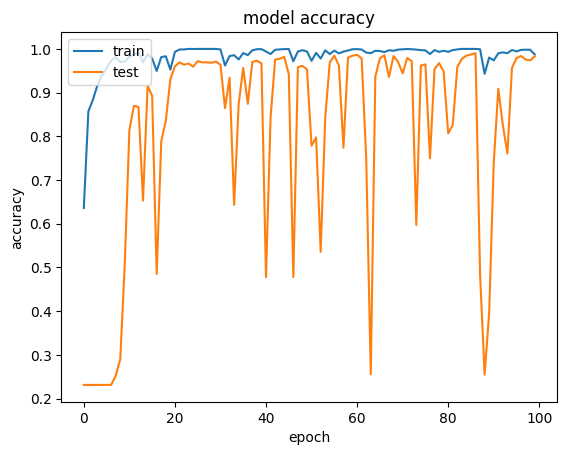

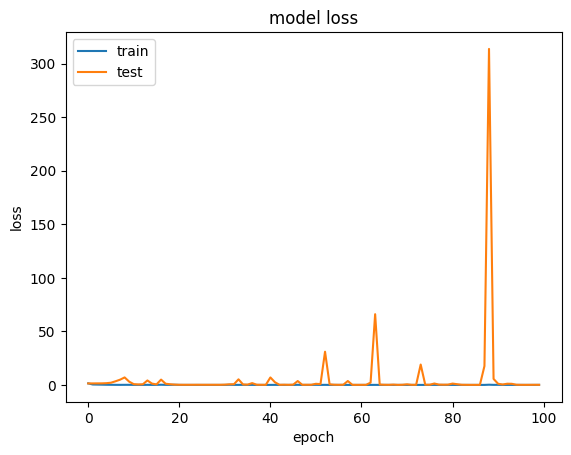

In [33]:

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[277   6   2   1]
 [  2 280   0   0]
 [  0   0 283   0]
 [  0   0   0 256]]


<Axes: >

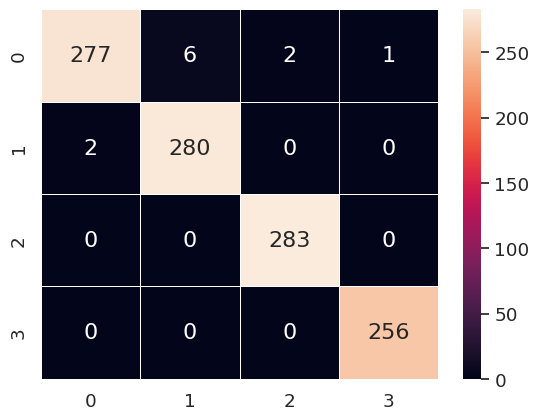

In [34]:
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_val, y_pred)
print(cm)
sn.set(font_scale=1.2)#for label size
sn.heatmap(cm, annot=True,fmt="d", linewidths=.5 ,annot_kws={"size": 16})# font size